In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
matplotlib.rcParams['figure.figsize'] = [10, 8]

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df['Date'] = pd.to_datetime(df.Date, errors='coerce')

In [6]:
df.Date.dtype

dtype('<M8[ns]')

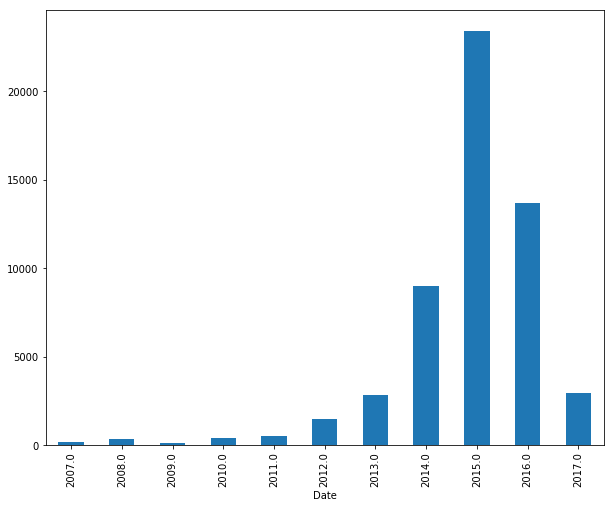

In [6]:
df.id.groupby([df["Date"].dt.year]).count().plot(kind="bar")

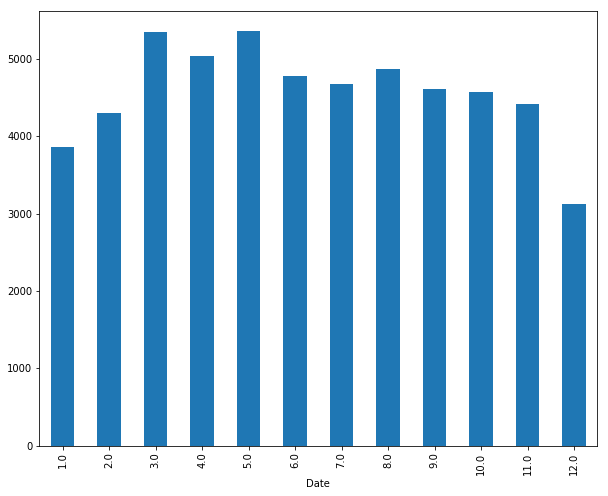

In [10]:
df.id.groupby([df["Date"].dt.month]).count().plot(kind="bar")

In [8]:
df.id.groupby([df["Date"].dt.year]).count()

Date
2007.0      166
2008.0      357
2009.0      124
2010.0      394
2011.0      530
2012.0     1483
2013.0     2851
2014.0     8978
2015.0    23436
2016.0    13673
2017.0     2953
Name: id, dtype: int64

In [22]:
df[pd.isnull(df.UF) & pd.isnull(df.Date)]

,id,File,Class,UF,Comarca,Date


In [29]:
df.Class.value_counts(normalize=True)

0.0                    0.668551
1.0                    0.331421
2016-06-09 00:00:00    0.000028
Name: Class, dtype: float64

36084